# Symbolic Algebra and the Jones Calculus

**Scott Prahl**

**April 2020**

In [1]:
#this must be run first
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import sympy
import pypolar.sym_jones as sym_jones
sympy.init_printing(use_latex='mathjax')


## Background

### Jones Vector for Linearly Polarized Light

A Jones vector is a 2x1 matrix that can represent fully polarized light.  Linearly polarized light is relatively simple
$$
\mbox{horizontal linearly polarized light}=
\left[\begin{array}{c} 
1\\
0\\
\end{array}\right]
$$
and

In [2]:
sym_jones.field_horizontal()

⎡1⎤
⎢ ⎥
⎣0⎦

$$
\mbox{vertical linearly polarized light}=
\left[\begin{array}{c} 
0\\
1\\
\end{array}\right]
$$

In [3]:
sym_jones.field_vertical()

⎡0⎤
⎢ ⎥
⎣1⎦

$$
\mbox{linearly polarized at $\theta$ from horizontal}=
\left[\begin{array}{c} 
\cos\theta\\
\sin\theta\\
\end{array}\right]
$$
So the vector for linearly polarized light at 45 degrees can be written in python as

In [4]:
theta = sympy.Symbol('theta', real=True)
sym_jones.field_linear(theta)

⎡cos(θ)⎤
⎢      ⎥
⎣sin(θ)⎦

### Jones Vectors for Circularly Polarized Light

For circularly polarized light, the direction of polarization rotates through an entire circle every wavelength, and retains a constant magnitude.  

Right circularly polarized light has the direction of polarization rotating clockwise when looking into the beam.  
$$
\mbox{right linearly polarized light}=
{1\over\sqrt{2}}\left[\begin{array}{c} 
j\\
1\\
\end{array}\right]
$$

In [5]:
sym_jones.field_right_circular()

⎡  √2  ⎤
⎢  ──  ⎥
⎢  2   ⎥
⎢      ⎥
⎢-√2⋅ⅈ ⎥
⎢──────⎥
⎣  2   ⎦

$$
\mbox{vertical linearly polarized light}=
{1\over\sqrt{2}}\left[\begin{array}{c} 
1\\
j\\
\end{array}\right]
$$
So the vector for left circularly polarized light can be written in python as

In [6]:
sym_jones.field_left_circular()

⎡ √2 ⎤
⎢ ── ⎥
⎢ 2  ⎥
⎢    ⎥
⎢√2⋅ⅈ⎥
⎢────⎥
⎣ 2  ⎦

### Elliptically polarized light
In general, the expression for elliptically polarized light is
$$
\mathbf{I}=
\left[\begin{array}{c} 
A\\
Be^{j\delta}\\
\end{array}\right]
$$

### Irradiance
The scalar intensity of the beam is the square of the field $E\cdot E^*$,
$$
\left[\begin{array}{c} 
A\\
Be^{j\delta}\\
\end{array}\right]
\cdot
\left[\begin{array}{c} 
A^* &
B^*e^{-j\delta}\\
\end{array}\right]
$$
or
$$
I= A A^* + B B^*
$$ 
where $A^*$ is the complex conjugate of $A$.

## Jones Matrix for Linear Polarizer

The Jones matrix representing a perfect horizontal polarizer is
$$
\mathbf{H}=\mbox{Horizontal Linear Polarizer}=\left[\begin{array}{cc}
1 & 0\\
0 & 0\\
\end{array}\right]
$$

The matrix representing a rotation through an angle $\theta$ is
$$
\mathbf{R}(\theta)=\mbox{Rotation by $\theta$}=\left[\begin{array}{cc}
\cos\theta & \sin \theta\\
-\sin\theta & \cos\theta\\
\end{array}\right]
$$

The matrix representing a linear polarizer oriented at an angle of $\theta$ to the horizontal axis can by rotating the beam so the axis coincides with the horizontal axis and then unrotating by the same amount
$$
\mbox{Linear Polarizer at $\theta$} = \mathbf{R}(-\theta)\cdot\mathbf{H}\cdot\mathbf{R}(\theta)
$$


In [7]:
## By rotation
theta = sympy.Symbol('theta', real=True)
H = sym_jones.op_linear_polarizer(0)
R = sym_jones.op_rotation(theta)
linear = sym_jones.op_rotation(-theta) * H * sym_jones.op_rotation(theta)
linear

⎡      2                     ⎤
⎢   cos (θ)     sin(θ)⋅cos(θ)⎥
⎢                            ⎥
⎢                     2      ⎥
⎣sin(θ)⋅cos(θ)     sin (θ)   ⎦

In [8]:
## Directly
sym_jones.op_linear_polarizer(theta)

⎡      2                     ⎤
⎢   cos (θ)     sin(θ)⋅cos(θ)⎥
⎢                            ⎥
⎢                     2      ⎥
⎣sin(θ)⋅cos(θ)     sin (θ)   ⎦

### Retarders and Wave Plates

An optical retarder has a fast and a slow axis.  Light polarized parallel to the fast axis  moves through the wave plate faster than light polarized perpendicular to the fast axis.  A phase lag (or retardance) $\phi$ is created between the two polarization states.  The Jones matrix for a retarder with its fast axis oriented at $\theta$ is
$$
\left[\begin{array}{cc}
\cos{\phi\over2} + j\sin{\phi\over2}\cos2\theta & j \sin{\phi\over2}\sin 2\theta\\
j \sin{\phi\over2}\sin 2\theta & \cos{\phi\over2} - j\sin{\phi\over2}\cos2\theta 
\end{array}\right]
$$

In [9]:
## are these the same??
phi = sympy.Symbol('phi', real=True)
sym_jones.op_retarder(theta,phi)

⎡ ⅈ⋅φ            -ⅈ⋅φ                                        ⎤
⎢ ───            ─────                                       ⎥
⎢  2     2         2      2              ⎛φ⎞                 ⎥
⎢ℯ   ⋅cos (θ) + ℯ     ⋅sin (θ)    2⋅ⅈ⋅sin⎜─⎟⋅sin(θ)⋅cos(θ)   ⎥
⎢                                        ⎝2⎠                 ⎥
⎢                                                            ⎥
⎢                                ⅈ⋅φ            -ⅈ⋅φ         ⎥
⎢                                ───            ─────        ⎥
⎢         ⎛φ⎞                     2     2         2      2   ⎥
⎢  2⋅ⅈ⋅sin⎜─⎟⋅sin(θ)⋅cos(θ)     ℯ   ⋅sin (θ) + ℯ     ⋅cos (θ)⎥
⎣         ⎝2⎠                                                ⎦

HaIf the thickness of the retarder is $d$ and the fast and slow indices of refraction are $n_o$ and $n_e$, then the retardance for a wavelength $\lambda$ is
$$
\phi(\lambda) = {2\pi\over\lambda} d (n_o-n_e)
$$
A half-wave plate has $\phi(\lambda)=\pi$ and a Jones matrix
$$
\mathbf{M}_\mathrm{\lambda/2}=j \left[\begin{array}{cc}
\cos2\theta & \sin 2\theta\\
\sin2\theta & -\cos2\theta
\end{array}\right]
$$

In [10]:
sympy.simplify(sym_jones.op_half_wave_plate(theta))

⎡ⅈ⋅cos(2⋅θ)  ⅈ⋅sin(2⋅θ) ⎤
⎢                       ⎥
⎣ⅈ⋅sin(2⋅θ)  -ⅈ⋅cos(2⋅θ)⎦

A quarter-wave plate has $\phi(\lambda)=\pi/2$ and
$$
\mathbf{M}_\mathrm{\lambda/4}={1\over\sqrt{2}}\left[\begin{array}{cc}
1 + j\cos2\theta & j\sin2\theta\\
j\sin2\theta & 1-j\cos 2\theta
\end{array}\right]
$$

In [11]:
## same??
sym_jones.op_quarter_wave_plate(theta)

⎡ -ⅈ⋅π             ⅈ⋅π                                       ⎤
⎢ ─────            ───                                       ⎥
⎢   4      2        4     2                                  ⎥
⎢ℯ     ⋅sin (θ) + ℯ   ⋅cos (θ)       √2⋅ⅈ⋅sin(θ)⋅cos(θ)      ⎥
⎢                                                            ⎥
⎢                                ⅈ⋅π            -ⅈ⋅π         ⎥
⎢                                ───            ─────        ⎥
⎢                                 4     2         4      2   ⎥
⎣     √2⋅ⅈ⋅sin(θ)⋅cos(θ)        ℯ   ⋅sin (θ) + ℯ     ⋅cos (θ)⎦

A retarder exhibits different retardances at a different wavelengths.  Because $n_o-n_e$ changes slowly with wavelength, the phase at $\lambda_1$ of a wave plated designed for $\lambda_0$ is
$$
\phi(\lambda_1) = \phi(\lambda_0) {\lambda_0\over\lambda_1}
$$
This is relevant because you will be using phase plates that are created for wavelengths other than 633nm.

### Optical Isolator

<img src="http://omlc.org/~prahl/host/450/week1/isolator.png" width="70%">


Linearly polarized light passes through the polarizer and is converted to right hand circularly polarized light by the quarter wave plate. Upon reflection, this beam will change handedness, and upon passage back through the quarter wave plate it is linear again but orthogonal to the polarizer.


## Malus's Law

Show that the transmission of linearly-polarized light as it passes through a linear analyzer at an angle $\theta$.

In [12]:
incident = sym_jones.field_horizontal()
linear = sym_jones.op_linear_polarizer(theta)
result = linear * incident
intensity = sym_jones.intensity(result)
fraction = sympy.simplify(intensity)
fraction

   2   
cos (θ)

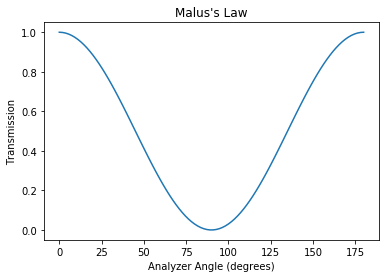

In [31]:
theta = np.linspace(0, 180, 100)
plt.plot(theta, np.cos(np.radians(theta))**2)

plt.title('Malus\'s Law')
plt.xlabel( "Analyzer Angle (degrees)" )
plt.ylabel( "Transmission" )
plt.show()

## Crossed polarizers with quarter-wave plate between

Show that the total transmission of horizontally-polarized light that passes through a quarter-wave plate oriented at an angle $\theta$ and then through a vertical analyzer is $2\cos^2\theta\sin^2\theta$ and plot the transmitted light as the polarizer is rotated through 180 degrees. 


In [22]:
theta = sympy.Symbol('theta', real=True)
incident = sym_jones.field_horizontal()

plate = sym_jones.op_quarter_wave_plate(theta)
analyzer = sym_jones.op_linear_polarizer(sympy.numbers.pi/2)
result = analyzer * plate * incident
fraction = sym_jones.intensity(result)
fraction


     2       2   
2⋅sin (θ)⋅cos (θ)

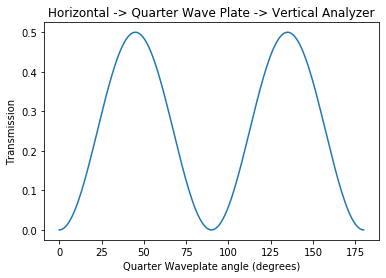

In [39]:
theta = np.linspace(0, 180, 180)
th = 2*np.radians(theta)
plt.plot(theta, 0.5*np.sin(th)**2)

plt.title('Horizontal -> Quarter Wave Plate -> Vertical Analyzer')
plt.xlabel( "Quarter Waveplate angle (degrees)" )
plt.ylabel( "Transmission" )
plt.show()

## Crossed polarizers with half-wave plate between

Show that the total transmission of horizontally-polarized light that passes through a half-wave plate and then through a vertical linear analyzer is $4\sin^2\theta\cos^2\theta = \sin^2 2\theta$ and plot as the analyzer is rotated through 180 degrees. 


In [21]:
theta = sympy.Symbol('theta', real=True)

incident = sym_jones.field_horizontal()
plate = sym_jones.op_half_wave_plate(theta)
analyzer = sym_jones.op_linear_polarizer(sympy.numbers.pi/2)

result = analyzer * plate * incident

fraction = sym_jones.intensity(result)
fraction

     2       2   
4⋅sin (θ)⋅cos (θ)

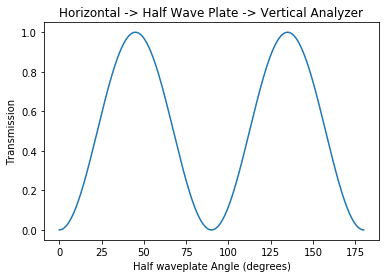

In [40]:
theta = np.linspace(0, 180, 500)

plt.plot(theta, np.sin(np.radians(2*theta))**2 )

plt.title('Horizontal -> Half Wave Plate -> Vertical Analyzer')
plt.xlabel( "Half waveplate Angle (degrees)" )
plt.ylabel( "Transmission" )
plt.show()

## Waveplates not at design wavelength

The phase shift in a halfwave plate depends on the wavelength. If the halfwave plates are designed for 532nm light, but we use them for 633nm light then how will the measurements be affected?  (Assume the speeds along the fast and slow axis are independent of wavelength).

Plot the transmitted light for both 633 and 532nm light.

In [28]:
f = sympy.Symbol('f', real=True)
theta = sympy.Symbol('theta', real=True)
lambda_0 = sympy.Symbol('lambda_0', real=True)
lambda_1 = sympy.Symbol('lambda_1', real=True)
f = lambda_0/lambda_1

incident = sym_jones.field_horizontal()
plate_1 = sym_jones.op_retarder(theta,f*sympy.numbers.pi)
analyzer = sym_jones.op_linear_polarizer(sympy.numbers.pi/2)

result_1 = analyzer * plate_1 * incident

fraction_1 = sym_jones.intensity(result_1)

fraction_1

     2       2⎛π⋅λ₀⎞    2   
4⋅sin (θ)⋅sin ⎜────⎟⋅cos (θ)
              ⎝2⋅λ₁⎠        

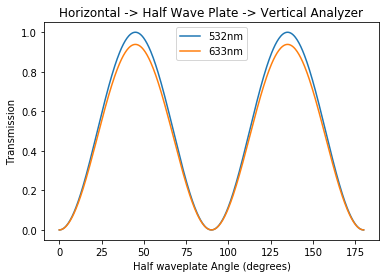

In [30]:
lambda_0 = 532e-9
lambda_1 = 633e-9
theta = np.linspace(0, 180, 500)
plt.plot(theta, np.sin(np.radians(2*theta))**2 ,label='532nm')
plt.plot(theta, np.sin(lambda_0*np.pi/2/lambda_1)**2*np.sin(np.radians(2*theta))**2, label='633nm' )

plt.title('Horizontal -> Half Wave Plate -> Vertical Analyzer')
plt.xlabel( "Half waveplate Angle (degrees)" )
plt.ylabel( "Transmission" )
plt.legend()
plt.show()